Created on Wed Nov 04 15:42:30 2020

Version 1.0

@author: kremp002

Project: "The use of genome scale metabolic modelling to optimize lipid production in the marine microalgae N. oceanica IMET1" master thesis by Tim Krempel

In this script the sampling function of COBRApy was used to plot the distribution of the fluxes inbetween the extremes samples where taken first without setting an objective (but not considered for analysis) and then while optimising for TAG sink (10% growth as constain) and biomass


In [1]:
# Import COBRApy and other packages for analyses
import cobra
from cobra.sampling import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.flux_analysis import find_essential_reactions
import statistics

In [2]:
# load the model
model = cobra.io.load_matlab_model("nsnew.mat")

Using license file C:\Users\timkr\gurobi.lic
Academic license - for non-commercial use only


In [19]:
# setting the compartimentalized biomass equation as an objective 
model.objective="Biomass_Nanno_compact"
solution_test=model.optimize()

<Solution 0.024 at 0x2bf20bf4b00>


In [20]:
# checking if the optimisation was successfull
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_LPAREN_e_RPAREN_,0.66,1,96.98%
h2o_e,EX_h2o_LPAREN_e_RPAREN_,0.7918,0,0.00%
hxan_e,EX_hxan_LPAREN_e_RPAREN_,0.004108,5,3.02%
mg2_e,EX_mg2_LPAREN_e_RPAREN_,0.0002453,0,0.00%
no3_e,EX_no3_LPAREN_e_RPAREN_,0.06657,0,0.00%
o2_e,EX_o2_LPAREN_e_RPAREN_,0.02064,0,0.00%
photonVis_e,EX_photonVis_LPAREN_e_RPAREN_,21.54,0,0.00%
pi_e,EX_pi_LPAREN_e_RPAREN_,0.02644,0,0.00%
s_e,EX_s_LPAREN_e_RPAREN_,0.0003868,0,0.00%
hso3_e,EX_so3_LPAREN_e_RPAREN_,0.0003868,0,0.00%


In [7]:
# carry out the flux sampling analysis for the biomass as objective with n=1000
s_bm=sample(model,1000)

Read LP format model from file C:\Users\timkr\AppData\Local\Temp\tmps9_6ua4f.lp
Reading time = 0.06 seconds
: 1992 rows, 4720 columns, 21224 nonzeros


In [8]:
# saving the results in a pandas Data Frame
df_bm=pd.DataFrame(data=s_bm)

In [21]:
# changing the objective of the model to the artificial TAG sink reaction (to simulate the accumulation in the lipid bodies).
# Also the lower bound of the biomass production is set to 10% of the optimum to ensure that the cells are still able to grow
model.objective = "TAG_Biomass_sink"
model.reactions.get_by_id("Biomass_Nanno_compact").lower_bound = 0.0024
solution_tag=model.optimize()

<Solution 2.211 at 0x2bf20ba7f28>


In [22]:
# checking if the optimisation was successfull
model.summary()

C:\Users\timkr\anaconda3\envs\myenv\lib\site-packages\cobra\core\metabolite.py:105: UserWarning: 0.269040256 is not an integer (in formula C0.269040256H0.479232738O0.030915107999999997)
  % (count, self.formula)
C:\Users\timkr\anaconda3\envs\myenv\lib\site-packages\cobra\core\metabolite.py:105: UserWarning: 0.479232738 is not an integer (in formula C0.269040256H0.479232738O0.030915107999999997)
  % (count, self.formula)
C:\Users\timkr\anaconda3\envs\myenv\lib\site-packages\cobra\core\metabolite.py:105: UserWarning: 0.030915107999999997 is not an integer (in formula C0.269040256H0.479232738O0.030915107999999997)
  % (count, self.formula)


Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_LPAREN_e_RPAREN_,0.66,1,99.69%
h2o_e,EX_h2o_LPAREN_e_RPAREN_,0.4388,0,0.00%
hxan_e,EX_hxan_LPAREN_e_RPAREN_,0.0004053,5,0.31%
mg2_e,EX_mg2_LPAREN_e_RPAREN_,2.42E-05,0,0.00%
no3_e,EX_no3_LPAREN_e_RPAREN_,0.006566,0,0.00%
o2_e,EX_o2_LPAREN_e_RPAREN_,0.04431,0,0.00%
photonVis_e,EX_photonVis_LPAREN_e_RPAREN_,19.28,0,0.00%
pi_e,EX_pi_LPAREN_e_RPAREN_,0.002609,0,0.00%
s_e,EX_s_LPAREN_e_RPAREN_,3.815E-05,0,0.00%
hso3_e,EX_so3_LPAREN_e_RPAREN_,3.815E-05,0,0.00%


In [10]:
# again creating the sample list with n=1000, this time with biomass as an objective
s_tag=sample(model,1000)


Read LP format model from file C:\Users\timkr\AppData\Local\Temp\tmp5kmsfh95.lp
Reading time = 0.02 seconds
: 1992 rows, 4720 columns, 21224 nonzeros


,PRISM_solar_litho,PRISM_solar_exo,PRISM_incandescent_60W,PRISM_fluorescent_warm_18W,PRISM_fluorescent_cool_215W,PRISM_metal_halide,PRISM_high_pressure_sodium,PRISM_growth_room,PRISM_white_LED,PRISM_red_LED_array_653nm,...,TAG_Biomass_sink,carbs_Biomass,carbs_Biomass_sink,nucleotides_Biomass,nt_Biomass_sink,pigments_Biomass,pigments_Biomass_sink,other_Biomass,other_Biomass_sink,Biomass_Nanno_compact
0,994.127165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038879,0.002400,7.469545e-08,0.002400,9.276985e-08,0.002401,6.875820e-07,0.002400,5.404477e-08,0.002400
1,994.130272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038878,0.002400,8.307337e-08,0.002400,1.009814e-07,0.002401,9.380169e-07,0.002400,1.426249e-07,0.002400
2,933.164409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.767388,0.002456,5.195451e-05,0.002464,5.997896e-05,0.003306,9.022935e-04,0.002498,9.439799e-05,0.002404
3,929.897134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.763009,0.002539,1.382013e-04,0.002430,2.986205e-05,0.004984,2.583180e-03,0.002563,1.620020e-04,0.002401
4,932.202779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.755081,0.002532,1.296196e-04,0.002448,4.534424e-05,0.003056,6.536460e-04,0.002604,2.017417e-04,0.002403


In [11]:
# create a Data Frame
df_tag=pd.DataFrame(data=s_tag)

<AxesSubplot:ylabel='Density'>

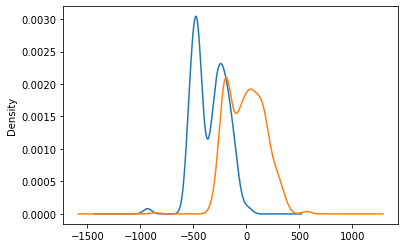

In [13]:
# This cell can be copied with any reaction that needs to be plotted... the loop to plot everything is still under construction :)
df_bm['MALOAAtm'].plot.kde()
df_tag['MALOAAtm'].plot.kde()

In [15]:
# command to check reaction details
model.reactions.get_by_id('MALOAAtm')

Reaction identifier,MALOAAtm
Name,"Dicarboxylate/tricarboxylate carrier (mal:oaa), mitochondrial"
Memory address,0x02bf233d3ac8
Stoichiometry,mal_DASH_L_m + oaa_c <=> mal_DASH_L_c + oaa_m L-Malate + Oxaloacetate <=> L-Malate + Oxaloacetate
GPR,NSV4U002571.m.18552
Lower bound,-1000.0
Upper bound,1000.0
